In [1]:
# conv net for cifar10 LeNet 5 by hand from zero
# course: https://www.icourse163.org/course/PKU-1002536002
#人工智能实践：Tensorflow笔记 北京大学 曹健

In [12]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.models
from tensorflow.keras import models,layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dense, Flatten
import time
np.set_printoptions(threshold=np.inf)
print(tf.__version__)

2.1.0


In [13]:
#https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
#"C:\Users\think\.keras\datasets\cifar-10-batches-py.tar.gz"
(x_train, y_train), (x_test, y_test)=keras.datasets.cifar10.load_data()
x_train.shape,y_train.shape,x_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3))

In [4]:
type(x_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

In [5]:
x_train.dtype,y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [6]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.c1=Conv2D(filters=6,kernel_size=(5,5),padding="valid")
#         self.b1=BatchNormalization()
        self.a1=keras.activations.sigmoid
        self.p1=layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid")
#         self.d1=layers.Dropout(0.2)

        self.c2=Conv2D(filters=16,kernel_size=(5,5),padding="valid")
#         self.b1=BatchNormalization()
        self.a2=keras.activations.sigmoid
        self.p2=layers.MaxPool2D(pool_size=(2,2),strides=2,padding="valid")
#         self.d1=layers.Dropout(0.2)


        self.f1=Flatten()
        self.dense1=Dense(120,activation=keras.activations.sigmoid)
        self.dense2=Dense(84,activation=keras.activations.sigmoid)
        self.dense3=Dense(10,activation=keras.activations.softmax)
    def call(self,x):
        x=self.c1(x)
#         x=self.b1(x)
        x=self.a1(x)
        x=self.p1(x)
#         x=self.d1(x)

        x=self.c2(x)
#         x=self.b1(x)
        x=self.a2(x)
        x=self.p2(x)
#         x=self.d1(x)

        x=self.f1(x)
        x=self.dense1(x)
        x=self.dense2(x)
        x=self.dense3(x)
        return x  

In [7]:
x_train =x_train / 255.
x_test =x_test / 255.
model = LeNet5()
model.build(input_shape=(None,32,32,3))
model.summary()

Model: "le_net5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  48120     
_________________________________________________________________
dense_1 (Dense)              multiple                  1016

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=["sparse_categorical_accuracy"])
checkpoint_filepath="./checkpoint/lenet5.ckpt"
if os.path.exists(checkpoint_filepath+".index"):
    print("======load wights========")
    model.load_weights(checkpoint_filepath)
checkpoint_callback=keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                   save_best_only=True,
                                                   save_weights_only=True)


In [10]:
history=model.fit(x=x_train,y=y_train,
                  batch_size=32,epochs=5,
                  callbacks=[checkpoint_callback],
                  validation_data=(x_test,y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 23s 461us/sample - loss: 2.0589 - sparse_categorical_accuracy: 0.2272 - val_loss: 1.9299 - val_sparse_categorical_accuracy: 0.2879
Epoch 2/5
50000/50000 [==============================] - 24s 478us/sample - loss: 1.8555 - sparse_categorical_accuracy: 0.3156 - val_loss: 1.7701 - val_sparse_categorical_accuracy: 0.3655
Epoch 3/5
50000/50000 [==============================] - 23s 464us/sample - loss: 1.6879 - sparse_categorical_accuracy: 0.3867 - val_loss: 1.6370 - val_sparse_categorical_accuracy: 0.4065
Epoch 4/5
50000/50000 [==============================] - 24s 473us/sample - loss: 1.5797 - sparse_categorical_accuracy: 0.4236 - val_loss: 1.5203 - val_sparse_categorical_accuracy: 0.4433
Epoch 5/5
50000/50000 [==============================] - 24s 472us/sample - loss: 1.4985 - sparse_categorical_accuracy: 0.4550 - val_loss: 1.4629 - val_sparse_categorical_accuracy: 0.4648


In [14]:
with open("./weights.txt","w") as f:
    for w in model.trainable_variables:
        f.write(str(w.name)+"\n")
        f.write(str(w.shape)+"\n")
        f.write(str(w.numpy())+"\n\n")

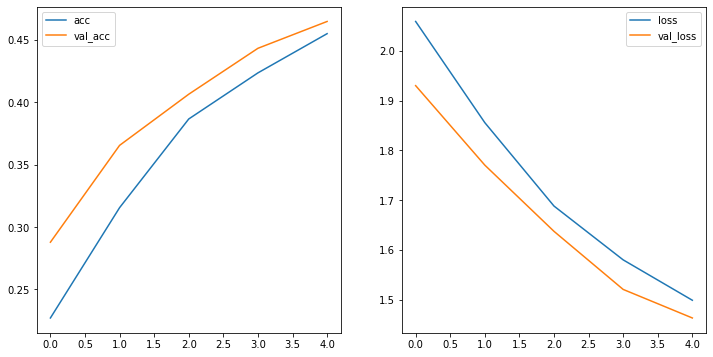

In [15]:
acc=history.history["sparse_categorical_accuracy"]
val_acc=history.history["val_sparse_categorical_accuracy"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(acc,label="acc")
plt.plot(val_acc,label="val_acc")
plt.legend(loc="best")
plt.subplot(1,2,2)
plt.plot(loss,label="loss")
plt.plot(val_loss,label="val_loss")
plt.legend(loc="best")
plt.show()

In [24]:
import time
time.localtime(time.time())

time.struct_time(tm_year=2020, tm_mon=4, tm_mday=14, tm_hour=12, tm_min=27, tm_sec=13, tm_wday=1, tm_yday=105, tm_isdst=0)

In [23]:
t1=time.time()
t2=time.time()
dt=t2-t1
print(dt)

0.0
